In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel('nyc_crimes.xls', skiprows=4)

In [3]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan
5,Alfred Village,4089.000,5.000,0.000,nan,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan
6,Allegany Village,1781.000,3.000,0.000,nan,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
7,Amherst Town,118296.000,107.000,1.000,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
8,Amityville Village,9519.000,9.000,0.000,nan,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
9,Amsterdam,18182.000,30.000,0.000,nan,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
City                                    351 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.7+ KB


In [5]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [6]:
# Create feature set including target variable
features = pd.DataFrame()
features['property_crime'] = df['Property\ncrime']
features['population'] = df['Population']
features['pop_square'] = df['Population'] ** 2
features['murder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
features['robbery'] = np.where(df['Robbery'] > 0, 1, 0)

features.head()

,property_crime,population,pop_square,murder,robbery
0,12.000,1861.000,3463321.000,0,0
1,24.000,2577.000,6640929.000,0,0
2,16.000,2846.000,8099716.000,0,0
3,4090.000,97956.000,9595377936.000,1,1
4,223.000,6388.000,40806544.000,0,1


In [18]:
features.describe()

,property_crime,population,pop_square,murder,robbery
count,351.000,351.000,351.000,351.000,351.000
mean,792.606,40037.632,203554650960.236,0.140,0.595
std,7626.827,448104.485,3762645508318.903,0.347,0.492
min,0.000,526.000,276676.000,0.000,0.000
25%,41.000,3010.500,9063112.500,0.000,0.000
50%,114.000,7411.000,54922921.000,0.000,1.000
75%,343.000,19324.500,373436342.500,0.000,1.000
max,141971.000,8396126.000,70494931807876.000,1.000,1.000


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 5 columns):
property_crime    348 non-null float64
population        348 non-null float64
pop_square        348 non-null float64
murder            351 non-null int64
robbery           351 non-null int64
dtypes: float64(3), int64(2)
memory usage: 13.8 KB


                property_crime  population  pop_square  murder  robbery
property_crime           1.000       0.996       0.991   0.191    0.079
population               0.996       1.000       0.998   0.162    0.064
pop_square               0.991       0.998       1.000   0.133    0.044
murder                   0.191       0.162       0.133   1.000    0.315
robbery                  0.079       0.064       0.044   0.315    1.000


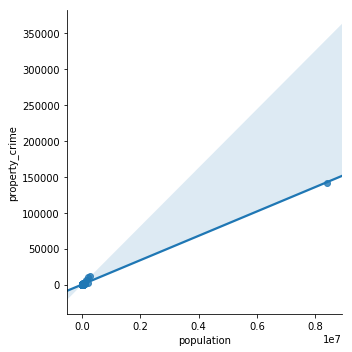

In [19]:
corrmat = features.corr()
print(corrmat)

sns.lmplot(
    x='population',
    y='property_crime', 
    data=features,
    scatter=True
)

plt.show()

In [10]:
# missing data
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pop_square,3,0.009
population,3,0.009
property_crime,3,0.009
robbery,0,0.000
murder,0,0.000


In [37]:
# Fill missing values with mean values for column
features.fillna(features.mode(), inplace=True)

total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
robbery,0,0.000
murder,0,0.000
pop_square,0,0.000
population,0,0.000
property_crime,0,0.000


In [38]:
features.describe()

,property_crime,population,pop_square,murder,robbery
count,350.000,350.000,350.000,350.000,350.000
mean,389.239,16163.094,2722144797.619,0.137,0.594
std,1030.598,27055.064,19369088414.868,0.344,0.492
min,0.000,526.000,276676.000,0.000,0.000
25%,41.000,3009.750,9058596.750,0.000,0.000
50%,113.500,7345.500,53960660.500,0.000,1.000
75%,342.500,19279.500,371703567.000,0.000,1.000
max,12491.000,258789.000,203554650960.236,1.000,1.000


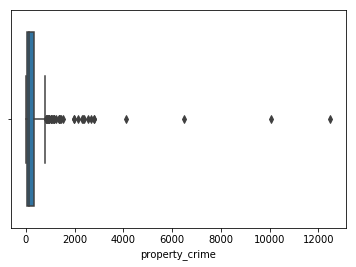

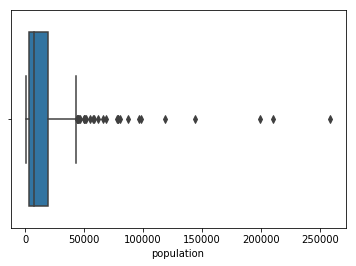

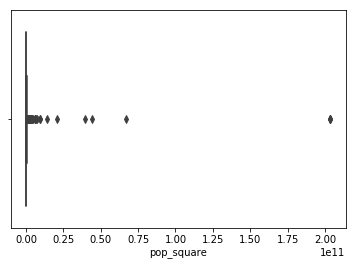

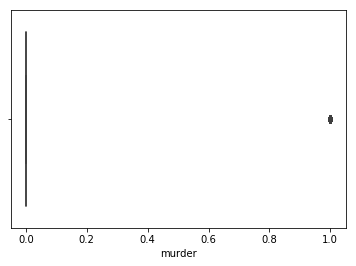

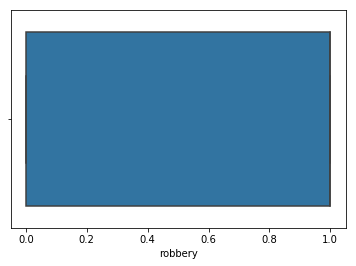

In [39]:
for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

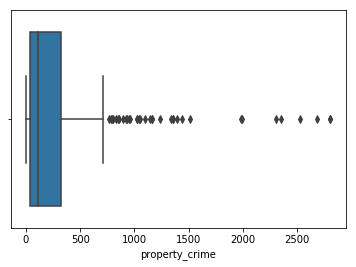

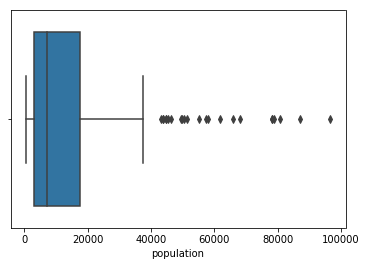

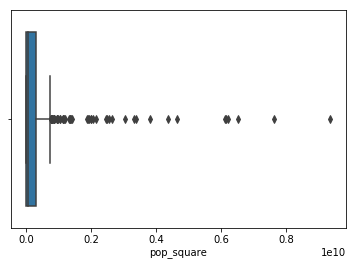

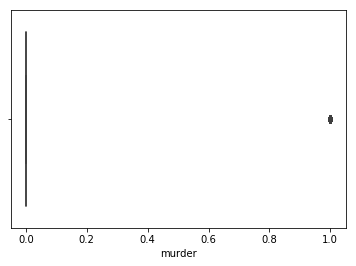

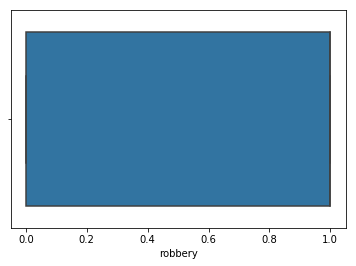

In [40]:
# Remove outliers
from scipy import stats

features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [41]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery']]
y = features['property_crime'].values.reshape(-1, 1)
# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


Coefficients: 
 [[1.76025070e-02 5.47224357e-08 1.68819501e+02 6.83403158e+01]]
Intercept: 
 [-35.26421913]
